In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
 import os, shutil, pathlib
original_dir = pathlib.Path("drive/MyDrive/Neural Network Projects/Neural Network/HW 3 Data/train")
new_base_dir = pathlib.Path("drive/MyDrive/Neural Network Projects/Neural Network/HW 3 Data/cats_vs_dogs_small")
# def make_subset(subset_name, start_index, end_index):
#     for category in ("cat", "dog"):
#       dir = new_base_dir / subset_name / category
#       os.makedirs(dir)
#       fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
#       for fname in fnames:
#         shutil.copyfile(src=original_dir / fname,
#         dst=dir / fname)
        
# make_subset("train", start_index=0, end_index=1000)
# make_subset("validation", start_index=1000, end_index=1500)
# make_subset("test", start_index=1500, end_index=2500)


In [4]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [7]:
# reshaped_dataset = train_dataset.map(lambda x: tf.reshape(x, (4, 4)))
# for i, element in enumerate(reshaped_dataset):
#   print(element.shape)
#   if i >= 2:
#     break

In [8]:
for data_batch, labels_batch in train_dataset:
 print("data batch shape:", data_batch.shape)
 print("labels batch shape:", labels_batch.shape)
 break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [9]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch.keras",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 198s 3s/step - loss: 0.7320 - accuracy: 0.5155 - val_loss: 0.6898 - val_accuracy: 0.6080
Epoch 2/30
63/63 [==============================] - 11s 168ms/step - loss: 0.6802 - accuracy: 0.5650 - val_loss: 0.7016 - val_accuracy: 0.5160
Epoch 3/30
63/63 [==============================] - 11s 168ms/step - loss: 0.6511 - accuracy: 0.6260 - val_loss: 0.6982 - val_accuracy: 0.5500
Epoch 4/30
63/63 [==============================] - 11s 165ms/step - loss: 0.6050 - accuracy: 0.6760 - val_loss: 0.6350 - val_accuracy: 0.6390
Epoch 5/30
63/63 [==============================] - 11s 167ms/step - loss: 0.5856 - accuracy: 0.7015 - val_loss: 0.6802 - val_accuracy: 0.6360
Epoch 6/30
63/63 [==============================] - 11s 166ms/step - loss: 0.5700 - accuracy: 0.7070 - val_loss: 1.1174 - val_accuracy: 0.5630
Epoch 7/30
63/63 [==============================] - 11s 166ms/step - loss: 0.5382 - accuracy: 0.7400 - val_loss: 0.6072 - val_accuracy: 0.6610
E

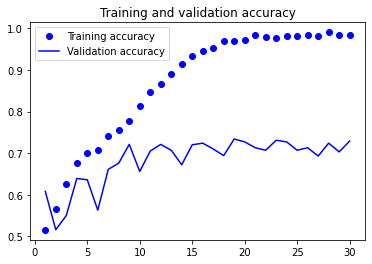

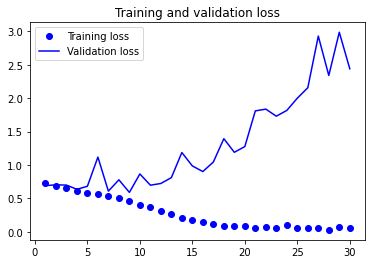

In [10]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [11]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 180s 2s/step - loss: 0.6049 - accuracy: 0.7105
Test accuracy: 0.711


In [12]:
data_augmentation = keras.Sequential(
    [
layers.experimental.preprocessing.RandomFlip("horizontal"),
layers.experimental.preprocessing.RandomRotation(0.1),
layers.experimental.preprocessing.RandomZoom(0.2),
    ]
)

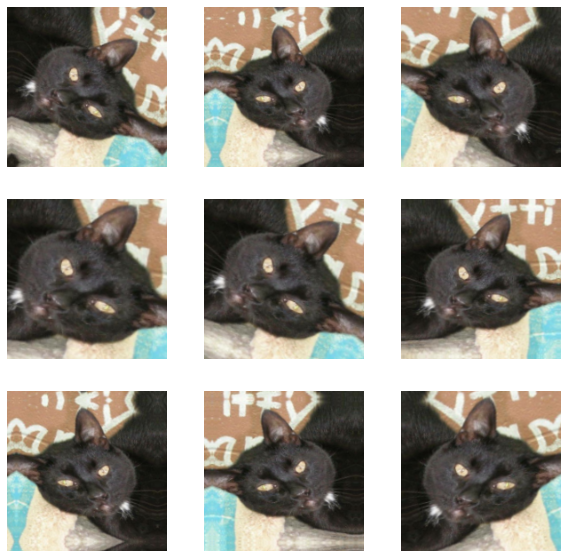

In [13]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

In [14]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch_with_augmentation.keras",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 13s 176ms/step - loss: 0.7247 - accuracy: 0.5175 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 12s 173ms/step - loss: 0.6972 - accuracy: 0.5185 - val_loss: 0.6873 - val_accuracy: 0.5920
Epoch 3/100
63/63 [==============================] - 12s 174ms/step - loss: 0.7447 - accuracy: 0.5715 - val_loss: 0.6581 - val_accuracy: 0.6230
Epoch 4/100
63/63 [==============================] - 13s 204ms/step - loss: 0.6595 - accuracy: 0.6155 - val_loss: 0.6806 - val_accuracy: 0.5590
Epoch 5/100
63/63 [==============================] - 12s 172ms/step - loss: 0.6578 - accuracy: 0.6385 - val_loss: 0.6288 - val_accuracy: 0.6230
Epoch 6/100
63/63 [==============================] - 11s 171ms/step - loss: 0.6202 - accuracy: 0.6625 - val_loss: 0.6164 - val_accuracy: 0.6450
Epoch 7/100
63/63 [==============================] - 11s 171ms/step - loss: 0.6130 - accuracy: 0.6740 - val_loss: 0.5741 - val_accuracy:

In [ ]:
# Displaying the curves of the loss and accuracy during training

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [ ]:
# Extracting four filters in the first convulutional layer

for layer in model.layers:
  if 'conv' in layer.name:
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    break


In [ ]:
# Normalize filter values
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [ ]:
# Drawing the filter output of first arbitary image

images = Image.open("/drive/MyDrive/Neural Network Projects/Neural Network/HW 3 Data/cats_vs_dogs_small/train/dog/dog.154.jpg")
images = np.asarray(images)/255
images = images.reshape(1, images.shape[0], images.shape[1], images.shape[2])
outputs=tf.nn.conv2d(images, filters,strides=1, padding="SAME")
plt.figure()
print("Original Image")
plt.imshow(images.reshape(images.shape[1], images.shape[2], images.shape[3]))
plt.figure()
plt.imshow(outputs[0,:,:,0], cmap="gray")

In [ ]:
# Instantiating the VGG model

conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(180, 180, 3))

In [ ]:
# Extracting the features and corresponding labels

import numpy as np
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [ ]:
# Creating a densly connected architecture

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="feature_extraction.keras",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(
train_features, train_labels,
epochs=20,
validation_data=(val_features, val_labels),
callbacks=callbacks)

In [ ]:
# Plotting the result

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


In [ ]:
# Feature extraction together with data augumentation
# Freezing the pre trained layers

conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False)
conv_base.trainable = False


In [ ]:
# Defining the model

data_augmentation = keras.Sequential(
[
layers.experimental.preprocessing.RandomFlip("horizontal"),
layers.experimental.preprocessing.RandomRotation(0.1),
layers.experimental.preprocessing.RandomZoom(0.2),
]
)
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [ ]:
# Training the model

callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="feature_extraction_with_data_augmentation.keras",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(
train_dataset,
epochs=50,
validation_data=validation_dataset,
callbacks=callbacks)

In [ ]:
# Plotting the result

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Test accuracy

test_model = keras.models.load_model(
"feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [ ]:
# freezing Method for fine tuning

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable = False


In [ ]:
# Fine tunning the model

model.compile(loss="binary_crossentropy",
optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
metrics=["accuracy"])
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="fine_tuning.keras",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(
train_dataset,
epochs=30,
validation_data=validation_dataset,
callbacks=callbacks)


In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [ ]:
# Feature extraction together with data augumentation
# Freezing the pre trained layers

conv_base = keras.applications.InceptionV3(
weights="imagenet",
include_top=False)
conv_base.trainable = False

In [ ]:
# Defining the model

data_augmentation = keras.Sequential(
[
layers.experimental.preprocessing.RandomFlip("horizontal"),
layers.experimental.preprocessing.RandomRotation(0.1),
layers.experimental.preprocessing.RandomZoom(0.2),
]
)
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [ ]:
# Training the model

callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="feature_extraction_with_data_augmentation.keras",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(
train_dataset,
epochs=50,
validation_data=validation_dataset,
callbacks=callbacks)

In [ ]:
# Plotting the result

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Test accuracy

test_model = keras.models.load_model(
"feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

In [ ]:
# Having experimented with various networks, VGG16 seems to be the best option with an accuracy of 97%